# Description

This code will simulate the date and statistical approach used in Mentiplay et al. (2015) entitled "Assessment of Lower Limb Muscle Strength and Power Using Hand-Held and Fixed Dynamometry: A Reliability and Validity Study".

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4624940/pdf/pone.0140822.pdf


Goals:
1. Recreate Knee Extension (KE) Strength Data from Table 2, Assessor A Lafayette
2. Run Statistical tests for ICC(2) intra-rater, SEM, MDC.
3. Compare Results from simulation to that of the paper.
4. Demonstrate a condensed version for knee flexion (KF)
5. Demonstrate an improved version using multivariate random approach


*   Sample Size = 30 participants
*   Distributions: Normal


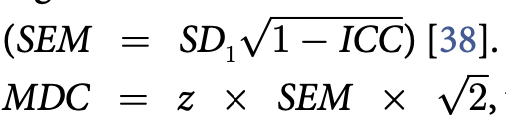




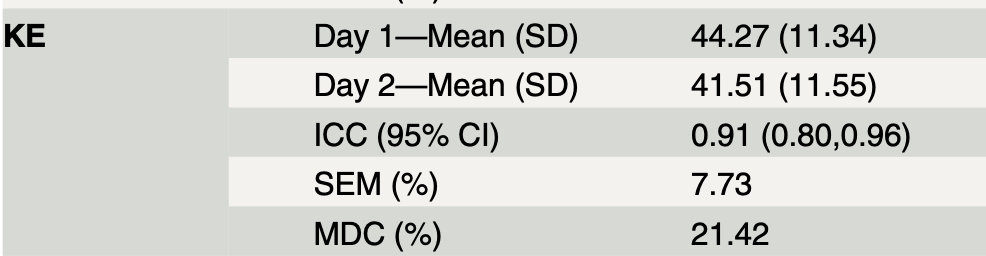


# Preamble

In [ ]:
!pip install pingouin
!pip install ptitprince # sometimes doesn't load in right - if error, restart and try again

#Data wrangling
import numpy as np
import pandas as pd

#Plots
import ptitprince as pt
import matplotlib.pyplot as plt
import seaborn as sns

#Stats
import pingouin as pg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=1ae1e38ca2f92e6a834e8dce157ceba3395016077981f5018d5a1cdbffd48705
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 5.9 MB/s eta 0:00:00
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10652 sha256=2ce0698ce431840c2c961ee70ea759de31a2f907cf06bb4e2033046ad04b5a11
  Stored in directory: /root/.cache/pip/wheels/0e/43/31/e76a3bf61865543f076a9d9eb027a740caefb379424ecba4e8
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERR

## Information on Packages:

Random numbers: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

Raincloud Plots: https://wellcomeopenresearch.org/articles/4-63

Stats: https://pingouin-stats.org/build/html/generated/pingouin.intraclass_corr.html#pingouin.intraclass_corr

# Simulate - Knee Extension
Table 2

Assessor A, Lafayette Model

In [ ]:
# Create a dictionary with column names

data = {'subject':[], 'A_KE_lafayette_d1':[],'A_KE_lafayette_d2':[]}

df = pd.DataFrame(data)

df['subject']

# Add subject numbers to the "subject" column
n=30

df['subject'] = range(1, n + 1)

df

,subject,A_KE_lafayette_d1,A_KE_lafayette_d2
0,1,NaN,NaN
1,2,NaN,NaN
2,3,NaN,NaN
3,4,NaN,NaN
4,5,NaN,NaN
5,6,NaN,NaN
6,7,NaN,NaN
7,8,NaN,NaN
8,9,NaN,NaN
9,10,NaN,NaN


## Day 1 Simulation

In [ ]:
# Simulate Data and add to columns

# Step 1: Define the simulated data for day_1
n = 30
mean = 44.27
sd = 11.34


# Step 2: Generate random data -- seed will keep this random set the same every time
np.random.seed(4)
random_day1 = np.random.normal(loc=mean, scale=sd, size=n)

# Step 3: Add random data to "A_KE_lafayette_d1"
df['A_KE_lafayette_d1'] = random_day1

# Check to confirm data was added
df.describe()

,subject,A_KE_lafayette_d1,A_KE_lafayette_d2
count,30.000000,30.000000,30.000000
mean,15.500000,44.673361,41.920831
std,8.803408,11.181207,11.388267
min,1.000000,26.300894,23.208133
25%,8.250000,34.073407,31.124582
50%,15.500000,45.485227,42.747731
75%,22.750000,50.778244,48.138767
max,30.000000,69.482905,67.189811


## Day 2 Simulation

    subject  A_KE_lafayette_d1  A_KE_lafayette_d2
0         1          44.843370          42.093988
1         2          49.939448          47.284438
2         3          32.976393          30.007252
3         4          52.135407          49.521063
4         5          39.526461          36.678617
5         6          26.300894          23.208133
6         7          36.925005          34.028987
7         8          51.057842          48.423543
8         9          48.037715          45.347488
9        10          31.257615          28.256645
10       11          51.285714          48.655635
11       12          43.272228          40.493751
12       13          49.090321          46.419586
13       14          48.037751          45.347524
14       15          31.151704          28.148772
15       16          48.250308          45.564017
16       17          37.387898          34.500452
17       18          61.812746          59.377611
18       19          52.472694          49.864596


<function matplotlib.pyplot.show(close=None, block=None)>

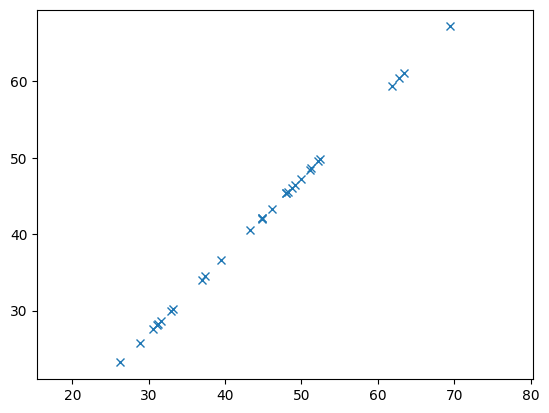

In [ ]:
# Simulate Data and add to columns

# Step 1: Define the simulated data for day_2
n = 30
mean = 41.51
sd = 11.55

# Step 2: Generate random data -- seed will keep this random set the same every time
np.random.seed(4)
random_day2 = np.random.normal(loc=mean, scale=sd, size=n)

# Step 3: Add random data to "A_KE_lafayette_d2"
df['A_KE_lafayette_d2'] = random_day2

# Check to confirm data was added
print(df)
print()
print(df.describe())
print()

# Plot
plt.plot(random_day1,random_day2,'x')
plt.axis('equal')
plt.show

## Modify to Long Format

In [ ]:
# Melt the DataFrame to long format
long_df = pd.melt(df, id_vars=['subject'], value_vars=['A_KE_lafayette_d1', 'A_KE_lafayette_d2'], var_name='day', value_name='value')

# Display the long format DataFrame
print(long_df)

    subject                day      value
0         1  A_KE_lafayette_d1  44.843370
1         2  A_KE_lafayette_d1  49.939448
2         3  A_KE_lafayette_d1  32.976393
3         4  A_KE_lafayette_d1  52.135407
4         5  A_KE_lafayette_d1  39.526461
5         6  A_KE_lafayette_d1  26.300894
6         7  A_KE_lafayette_d1  36.925005
7         8  A_KE_lafayette_d1  51.057842
8         9  A_KE_lafayette_d1  48.037715
9        10  A_KE_lafayette_d1  31.257615
10       11  A_KE_lafayette_d1  51.285714
11       12  A_KE_lafayette_d1  43.272228
12       13  A_KE_lafayette_d1  49.090321
13       14  A_KE_lafayette_d1  48.037751
14       15  A_KE_lafayette_d1  31.151704
15       16  A_KE_lafayette_d1  48.250308
16       17  A_KE_lafayette_d1  37.387898
17       18  A_KE_lafayette_d1  61.812746
18       19  A_KE_lafayette_d1  52.472694
19       20  A_KE_lafayette_d1  44.793177
20       21  A_KE_lafayette_d1  33.122875
21       22  A_KE_lafayette_d1  44.887267
22       23  A_KE_lafayette_d1  46

## Plot our Results

<function matplotlib.pyplot.show(close=None, block=None)>

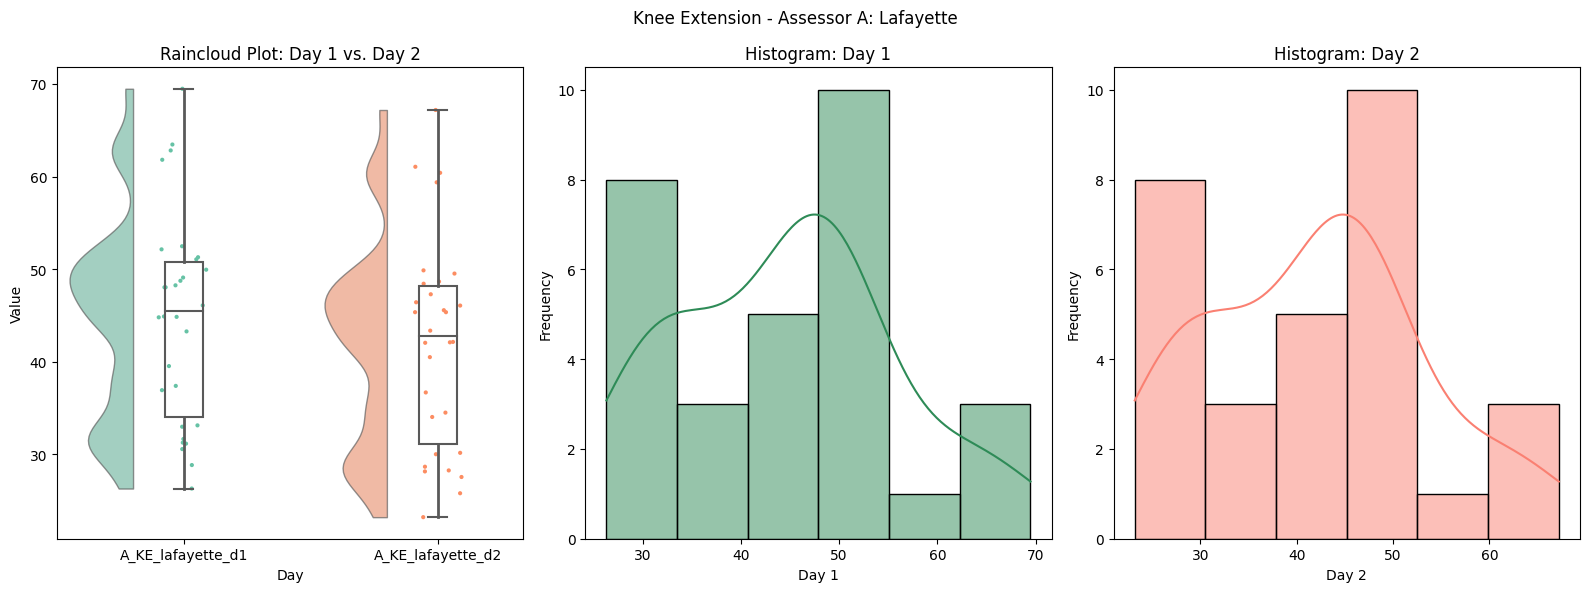

In [ ]:
# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

# Raincloud Plot
ax = axes[0]
pt.RainCloud(x='day', y='value', data=long_df, width_viol = .5, alpha=.65, ax=ax)
ax.set_xlabel("Day")
ax.set_ylabel("Value")
ax.set_title("Raincloud Plot: Day 1 vs. Day 2")

# Histogram for Day 1
ax = axes[1]
sns.histplot(df['A_KE_lafayette_d1'], kde=True, ax=ax, color='seagreen')
ax.set_xlabel("Day 1")
ax.set_ylabel("Frequency")
ax.set_title("Histogram: Day 1")

# Histogram for Day 2
ax = axes[2]
sns.histplot(df['A_KE_lafayette_d2'], kde=True, ax=ax, color='salmon')
ax.set_xlabel("Day 2")
ax.set_ylabel("Frequency")
ax.set_title("Histogram: Day 2")

plt.suptitle("Knee Extension - Assessor A: Lafayette")
plt.tight_layout()
plt.show

# Statistics - Knee Extension

## ICC

In [ ]:
# ICC Intra-rater reliability
    ## data = long format data frame
    ## targets = repeated subjects within "subject"
    ## raters = categories of raters in our case day1 and day2 within "day"
    ## ratings = the actual value column "value"
icc = pg.intraclass_corr(data=long_df, targets='subject', raters='day',
                         ratings='value').round(3)
icc.set_index("Type", "Description")

# Goal: ICC(2) Single Rater, Same subjects, two days
# Output: ICC(2) = 0.971 (0.03,0.99)

#Although argument could be made that ICC3 may have been warranted for single
#raters where consistency is less important

<ipython-input-7-19e5419efe51>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  icc.set_index("Type", "Description")


,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.971,66.867,29,30,0.0,"[0.94, 0.99]"
ICC2,Single random raters,0.971,11881.000,29,29,0.0,"[0.03, 0.99]"
ICC3,Single fixed raters,1.000,11881.000,29,29,0.0,"[1.0, 1.0]"
ICC1k,Average raters absolute,0.985,66.867,29,30,0.0,"[0.97, 0.99]"
ICC2k,Average random raters,0.985,11881.000,29,29,0.0,"[0.06, 1.0]"
ICC3k,Average fixed raters,1.000,11881.000,29,29,0.0,"[1.0, 1.0]"


## SEM and MDC

In [ ]:
# Extract the ICC value from the result - assign ICC2 to a variable
icc_value = icc['ICC'].iloc[1]  # column "ICC" iloc[1] is selecting the 2nd row
print("ICC(2,1):", icc_value)


sd_day1 = np.std(df['A_KE_lafayette_d1'])     #sd of day 1
mean_day1 = np.mean(df['A_KE_lafayette_d1'])  #mean of day 1


# test with the values provided in their table
#icc_value = 0.91
#sd_day1 = 11.34
#mean_day1 = 44.27


# Calculate the SEM from first visit and express as a percentage of the mean
sem = sd_day1 * np.sqrt(1 - icc_value)
sem_percent = (sem/mean_day1)*100


print()
print("Standard Error of Measurement (% of Mean)")
print("SEM:", sem.round(2))
print("SEM (%):", sem_percent.round(2))
print()


# Calculate MDC (%) and express as a percentage of the mean
z = 1.96  #normal distribution
mdc = z * sem * np.sqrt(2)
mdc_percent = (mdc/mean_day1)*100

print("Minimal Detectable Change (% of Mean)")
print("MDC:", mdc.round(2))
print("MDC (%):", mdc_percent.round(2))


ICC(2,1): 0.971

Standard Error of Measurement (% of Mean)
SEM: 3.4
SEM (%): 7.68

Minimal Detectable Change (% of Mean)
MDC: 9.43
MDC (%): 21.3


# Condensed Simulation - Knee Flexion

Table 2. Assessor A -- Knee Flexion - Lafayette

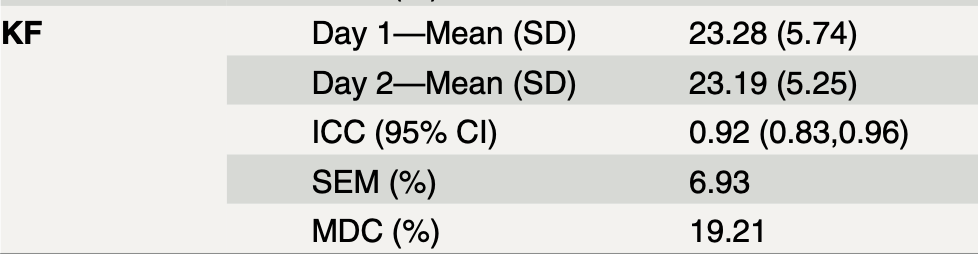

## Simulation

    subject  A_KF_lafayette_d1  A_KF_lafayette_d2
0         1          24.865766          24.640396
1         2          12.634435          13.453203
2         3          26.861192          26.465481
3         4          29.854087          29.202884
4         5          29.233473          28.635250
5         6          34.109307          33.094854
6         7          22.638852          22.603584
7         8          21.201538          21.288968
8         9          24.133395          23.970544
9        10          20.767125          20.891638
10       11          35.743015          34.589099
11       12          29.894261          29.239629
12       13          12.840017          13.641235
13       14          22.487597          22.465241
14       15          26.378679          26.024158
15       16          13.089880          13.869768
16       17          30.827391          30.093102
17       18          20.562408          20.704398
18       19          17.010600          17.455793


<function matplotlib.pyplot.show(close=None, block=None)>

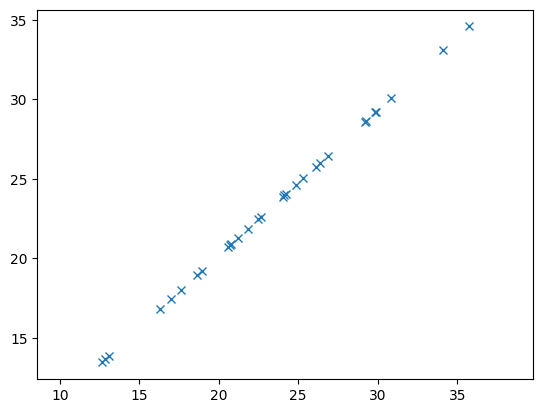

In [ ]:
# Create a dictionary with column names
data_KF = {'subject':[], 'A_KF_lafayette_d1':[],'A_KF_lafayette_d2':[]}
df_kf = pd.DataFrame(data_KF)

#sample size
n=30
df_kf['subject'] = range(1, n + 1)

#DAY 1
mean1 = 23.28
sd1 = 5.74

np.random.seed(17)
random_day1 = np.random.normal(loc=mean1, scale=sd1, size=n)
df_kf['A_KF_lafayette_d1'] = random_day1

#DAY 2
mean2 = 23.19
sd2 = 5.25

np.random.seed(17)
random_day2 = np.random.normal(loc=mean2, scale=sd2, size=n)
df_kf['A_KF_lafayette_d2'] = random_day2

# Check to confirm data was added
print(df_kf)
print()
print(df_kf.describe())

#Long format
long_kf = pd.melt(df_kf, id_vars=['subject'], value_vars=['A_KF_lafayette_d1', 'A_KF_lafayette_d2'], var_name='day', value_name='value')

# Plot
plt.plot(random_day1,random_day2,'x')
plt.axis('equal')
plt.show



## Plots

<function matplotlib.pyplot.show(close=None, block=None)>

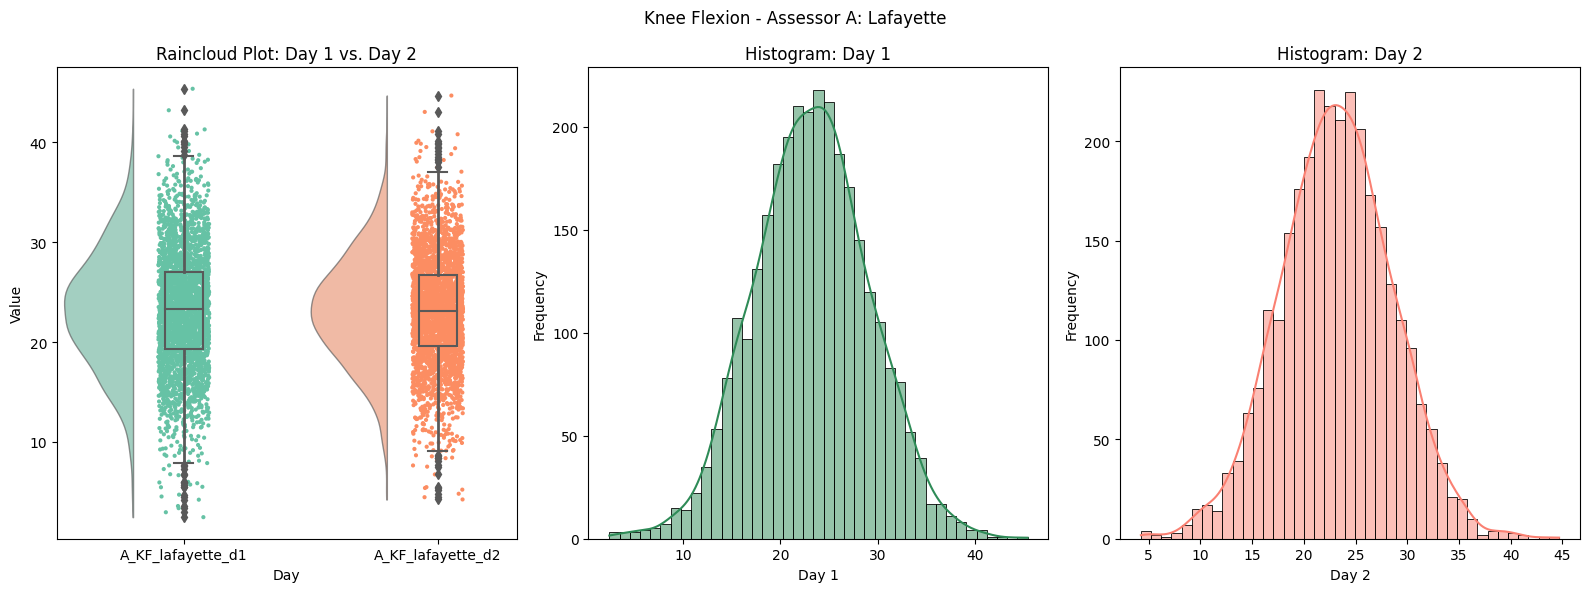

In [ ]:
# Plots
# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

# Raincloud Plot
ax = axes[0]
pt.RainCloud(x='day', y='value', data=long_kf, width_viol = .6, alpha=.65, ax=ax)
ax.set_xlabel("Day")
ax.set_ylabel("Value")
ax.set_title("Raincloud Plot: Day 1 vs. Day 2")

# Histogram for Day 1
ax = axes[1]
sns.histplot(df_kf['A_KF_lafayette_d1'], kde=True, ax=ax, color='seagreen')
ax.set_xlabel("Day 1")
ax.set_ylabel("Frequency")
ax.set_title("Histogram: Day 1")

# Histogram for Day 2
ax = axes[2]
sns.histplot(df_kf['A_KF_lafayette_d2'], kde=True, ax=ax, color='salmon')
ax.set_xlabel("Day 2")
ax.set_ylabel("Frequency")
ax.set_title("Histogram: Day 2")

plt.suptitle("Knee Flexion - Assessor A: Lafayette")
plt.tight_layout()
plt.show

## Stats

In [ ]:
icc = pg.intraclass_corr(data=long_kf, targets='subject', raters='day', ratings='value').round(3)
print(icc.set_index("Type", "Description"))
print()

# Extract the ICC value from the result - assign ICC2 to a variable
icc_value = icc['ICC'].iloc[1]
print("ICC(2,1):", icc_value)


sd_day1 = np.std(df['A_KF_lafayette_d1'])
mean_day1 = np.mean(df['A_KF_lafayette_d1'])


# test with the values provided in their table
#icc_value = 0.92
#sd_day1 = 5.74
#mean_day1 = 23.28


# Calculate the SEM from first visit and express as a percentage of the mean
sem = sd_day1 * np.sqrt(1 - icc_value)
sem_percent = (sem/mean_day1)*100


print()
print("Standard Error of Measurement (% of Mean)")
print("SEM:", sem.round(2))
print("SEM (%):", sem_percent.round(2))
print()


# Calculate MDC (%) and express as a percentage of the mean
z = 1.96  #normal distribution
mdc = z * sem * np.sqrt(2)
mdc_percent = (mdc/mean_day1)*100

print("Minimal Detectable Change (% of Mean)")
print("MDC:", mdc.round(2))
print("MDC (%):", mdc_percent.round(2))
print()

                   Description    ICC        F  df1  df2  pval        CI95%
Type                                                                       
ICC1    Single raters absolute  0.996  504.539   29   30   0.0  [0.99, 1.0]
ICC2      Single random raters  0.996  503.041   29   29   0.0  [0.99, 1.0]
ICC3       Single fixed raters  0.996  503.041   29   29   0.0  [0.99, 1.0]
ICC1k  Average raters absolute  0.998  504.539   29   30   0.0   [1.0, 1.0]
ICC2k    Average random raters  0.998  503.041   29   29   0.0   [1.0, 1.0]
ICC3k     Average fixed raters  0.998  503.041   29   29   0.0   [1.0, 1.0]

ICC(2,1): 0.996

Standard Error of Measurement (% of Mean)
SEM: 0.35
SEM (%): 1.5

Minimal Detectable Change (% of Mean)
MDC: 0.98
MDC (%): 4.15



<ipython-input-145-507fec4eab62>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  print(icc.set_index("Type", "Description"))


# Multivariate Normal - Simulation (Knee Flexion)

Okay... What if we want to sample from a population with specific relationships between variables? We can sample from a multivariate normal distribution using multivariate.normal from the NumPy package.

https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

Table 2. Assessor A -- Knee Flexion Lafayette

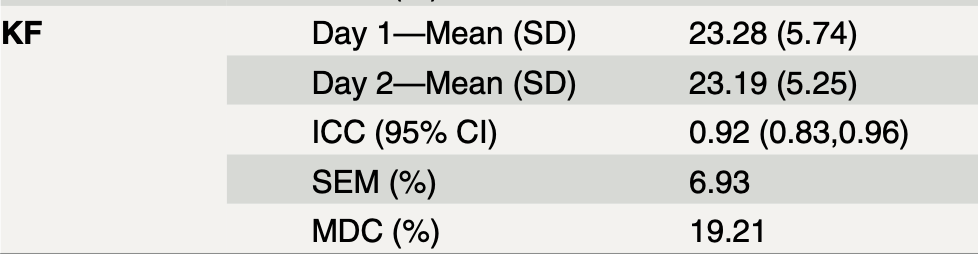

## Simulation

           subject  A_KF_lafayette_d1  A_KF_lafayette_d2
count  3000.000000        3000.000000        3000.000000
mean   1500.500000          23.231159          23.162103
std     866.169729           5.907181           5.421091
min       1.000000           2.460656           4.234155
25%     750.750000          19.287422          19.562113
50%    1500.500000          23.283675          23.149344
75%    2250.250000          27.021687          26.685149
max    3000.000000          45.371914          44.691193



<function matplotlib.pyplot.show(close=None, block=None)>

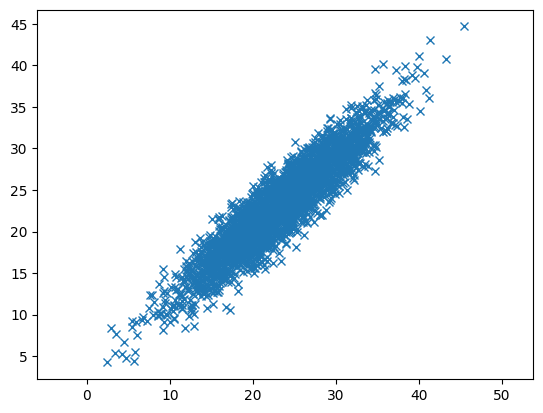

In [ ]:
# Create a dictionary with column names
data_KF = {'subject':[], 'A_KF_lafayette_d1':[],'A_KF_lafayette_d2':[]}
df_kf = pd.DataFrame(data_KF)


#Step 1: Assign variables for Day 1 and day 2
n=30
df_kf['subject'] = range(1, n + 1)

mean1 = 23.28
mean2 = 23.19

sd1 = 5.74
sd2 = 5.25

# To be more precise we can anchor our random data around a correlation value

## ICC value from table
icc_kf = 0.92

#Covariance Matrix [SD1**2, ICC*SD1*SD2]
#                  [ICC*SD1*SD2, SD2**2]

cov_mult = ([[sd1**2, icc_kf*sd1*sd2], [icc_kf*sd1*sd2,sd2**2]])
mean_mult = ([mean1, mean2])


# Step 2: Randomly generate multivariate data with a normal distribution

random_day1,random_day2 = np.random.default_rng().multivariate_normal(mean=mean_mult, cov=cov_mult, size=n).T
      # This will generate 2 arrays based on our parameters (sample size, means, covariance)

df_kf['A_KF_lafayette_d1'] = random_day1
df_kf['A_KF_lafayette_d2'] = random_day2

# Check to confirm data was added
print(df_kf.describe())
print()



#Step 3: Melt into long format

long_kf = pd.melt(df_kf, id_vars=['subject'], value_vars=['A_KF_lafayette_d1', 'A_KF_lafayette_d2'],
                  var_name='day', value_name='value')


# Plot
plt.plot(random_day1,random_day2,'x')
plt.axis('equal')
plt.show



## Plots

<function matplotlib.pyplot.show(close=None, block=None)>

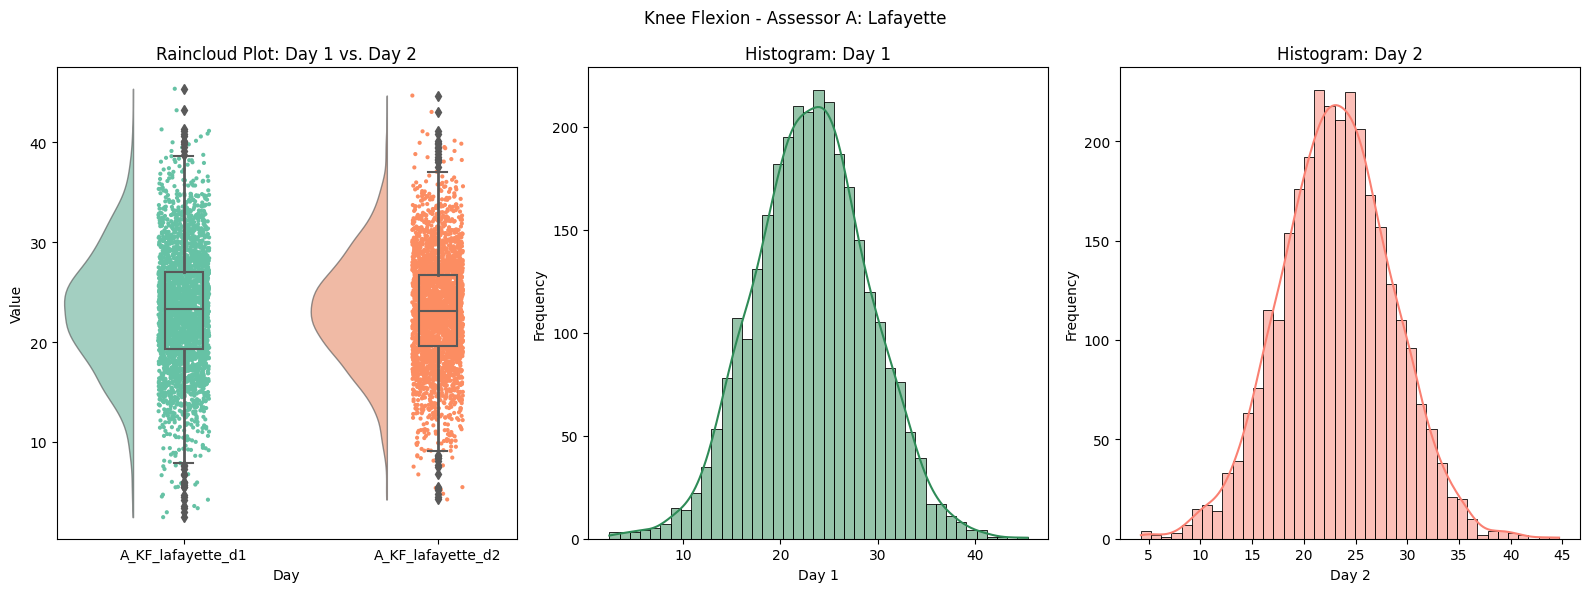

In [ ]:
# Plots

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

# Raincloud Plot
ax = axes[0]
pt.RainCloud(x='day', y='value', data=long_kf, width_viol = .6, alpha=.65, ax=ax)
ax.set_xlabel("Day")
ax.set_ylabel("Value")
ax.set_title("Raincloud Plot: Day 1 vs. Day 2")

# Histogram for Day 1
ax = axes[1]
sns.histplot(df_kf['A_KF_lafayette_d1'], kde=True, ax=ax, color='seagreen')
ax.set_xlabel("Day 1")
ax.set_ylabel("Frequency")
ax.set_title("Histogram: Day 1")

# Histogram for Day 2
ax = axes[2]
sns.histplot(df_kf['A_KF_lafayette_d2'], kde=True, ax=ax, color='salmon')
ax.set_xlabel("Day 2")
ax.set_ylabel("Frequency")
ax.set_title("Histogram: Day 2")

plt.suptitle("Knee Flexion - Assessor A: Lafayette")
plt.tight_layout()
plt.show

## Stats

In [ ]:
# Intraclass correlation
icc = pg.intraclass_corr(data=long_kf, targets='subject', raters='day', ratings='value').round(3)
print(icc.set_index("Type", "Description"))
print()

# Extract the ICC value from the result - assign ICC2 to a variable
icc_value = icc['ICC'].iloc[1]
print("ICC(2,1):", icc_value)


sd_day1 = np.std(df_kf['A_KF_lafayette_d1'])
mean_day1 = np.mean(df_kf['A_KF_lafayette_d1'])


# test with the values provided in their table
#icc_value = 0.92
#sd_day1 = 5.74
#mean_day1 = 23.28


# Calculate the SEM from first visit and express as a percentage of the mean
sem = sd_day1 * np.sqrt(1 - icc_value)
sem_percent = (sem/mean_day1)*100


print()
print("Standard Error of Measurement (% of Mean)")
print("SEM:", sem.round(2))
print("SEM (%):", sem_percent.round(2))
print()


# Calculate MDC (%) and express as a percentage of the mean
z = 1.96  #normal distribution
mdc = z * sem * np.sqrt(2)
mdc_percent = (mdc/mean_day1)*100

print("Minimal Detectable Change (% of Mean)")
print("MDC:", mdc.round(2))
print("MDC (%):", mdc_percent.round(2))
print()

                   Description    ICC      F  df1  df2  pval         CI95%
Type                                                                      
ICC1    Single raters absolute  0.798  8.879   29   30   0.0   [0.62, 0.9]
ICC2      Single random raters  0.798  9.295   29   29   0.0   [0.62, 0.9]
ICC3       Single fixed raters  0.806  9.295   29   29   0.0   [0.63, 0.9]
ICC1k  Average raters absolute  0.887  8.879   29   30   0.0  [0.77, 0.95]
ICC2k    Average random raters  0.888  9.295   29   29   0.0  [0.77, 0.95]
ICC3k     Average fixed raters  0.892  9.295   29   29   0.0  [0.77, 0.95]

ICC(2,1): 0.798

Standard Error of Measurement (% of Mean)
SEM: 2.22
SEM (%): 9.24

Minimal Detectable Change (% of Mean)
MDC: 6.16
MDC (%): 25.61



<ipython-input-46-fe46c41a71e4>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  print(icc.set_index("Type", "Description"))


# Conclusion

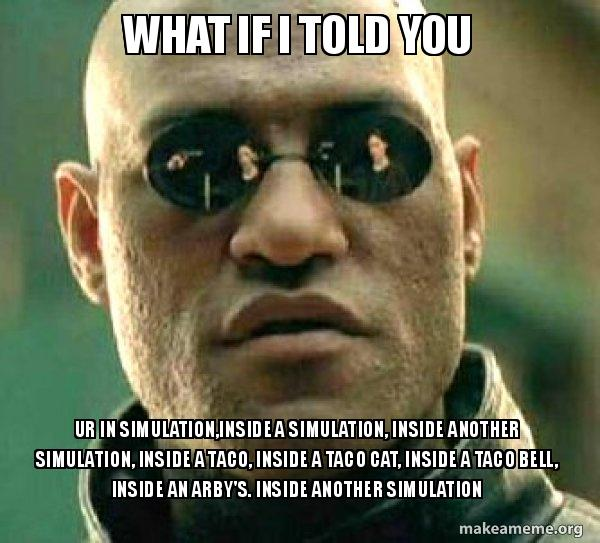

Simulating data can be used for:

1. **Replicating** data and statistical models from published work --> Deepen Understanding

2. **Upsampling** published data to test different models --> Build theories to enhance your next study

3. Simulate "**what if**" scenarios - testing interventions on variables and how it affects outcomes data

4. Generate new data to **pilot test** your study's workflows before collection begins

# Interested in Learning More?

Sport Science Data -- simulated in R (7-part series) by Patrick Ward, PhD

http://optimumsportsperformance.com/blog/simulations-in-r-part-7-measurement-error-in-regression/